In [53]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  #too good we can to use this :)

#my data set was documented in the previous assignment
datas = pd.read_csv('../data/raw/GeneralEsportData.csv')
datas = datas.rename(columns={"TotalTournaments": "TotalMatches"})
#create a new calculated column
datas['OfflineEarnings'] = datas['TotalEarnings'] - datas['OnlineEarnings']
#filling in missing values
datas = datas.fillna(0)
datas

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalMatches,OfflineEarnings
0,Age of Empires,1997,Strategy,190075.61,156839.89,246,95,33235.72
1,Age of Empires II,1999,Strategy,1689260.72,618974.87,1105,729,1070285.85
2,Age of Empires III,2005,Strategy,68113.85,41500.00,106,76,26613.85
3,Age of Empires Online,2011,Strategy,3778.56,0.00,17,10,3778.56
4,Age of Mythology,2002,Strategy,52360.00,52000.00,22,6,360.00
...,...,...,...,...,...,...,...,...
508,Gears of War 3,2011,Third-Person Shooter,7255.81,4555.81,13,4,2700.00
509,Gears of War 4,2016,Third-Person Shooter,3087285.00,3055000.00,135,41,32285.00
510,Gears of War: Ultimate Edition,2015,Third-Person Shooter,170000.00,170000.00,39,3,0.00
511,Rogue Company,2020,Third-Person Shooter,50000.00,0.00,48,2,50000.00


In [52]:
old_data = datas[datas['ReleaseDate']<2001]
middle_data = datas[datas['ReleaseDate']<=2010]
middle_data = middle_data[middle_data['ReleaseDate']>2000]
modern_data = datas[datas['ReleaseDate']>2010]

old_data_filtered = old_data[datas['TotalEarnings']>100]
old_data_filtered = old_data_filtered[old_data_filtered['TotalPlayers']>30]
old_data_filtered = old_data_filtered[old_data_filtered['TotalMatches']>20]

middle_data_filtered = middle_data[datas['TotalEarnings']>100000]
middle_data_filtered = middle_data_filtered[middle_data_filtered['TotalPlayers']>100]
middle_data_filtered = middle_data_filtered[middle_data_filtered['TotalMatches']>50]

modern_data_filtered = modern_data[datas['TotalEarnings']>100000]
modern_data_filtered = modern_data_filtered[modern_data_filtered['TotalPlayers']>1000]
modern_data_filtered = modern_data_filtered[modern_data_filtered['TotalMatches']>100]

#calculate value counts
print(old_data_filtered.count())
print(middle_data_filtered.count())
modern_data_filtered.count()


Game               9
ReleaseDate        9
Genre              9
TotalEarnings      9
OnlineEarnings     9
TotalPlayers       9
TotalMatches       9
OfflineEarnings    9
dtype: int64
Game               20
ReleaseDate        20
Genre              20
TotalEarnings      20
OnlineEarnings     20
TotalPlayers       20
TotalMatches       20
OfflineEarnings    20
dtype: int64


Game               13
ReleaseDate        13
Genre              13
TotalEarnings      13
OnlineEarnings     13
TotalPlayers       13
TotalMatches       13
OfflineEarnings    13
dtype: int64

In [42]:
old_earning = {}
old_player = {}
old_matches = {}
#calculate summary statistics
old_earning['First-Person Shooter'] = old_data_filtered[old_data_filtered['Genre'] == 'First-Person Shooter']['TotalEarnings'].sum()
old_earning['Strategy'] = old_data_filtered[old_data_filtered['Genre'] == 'Strategy']['TotalEarnings'].sum()
old_earning['Fighting Game'] = old_data_filtered[old_data_filtered['Genre'] == 'Fighting Game']['TotalEarnings'].sum()

old_player['First-Person Shooter'] = old_data_filtered[old_data_filtered['Genre'] == 'First-Person Shooter']['TotalPlayers'].sum()
old_player['Strategy'] = old_data_filtered[old_data_filtered['Genre'] == 'Strategy']['TotalPlayers'].sum()
old_player['Fighting Game'] = old_data_filtered[old_data_filtered['Genre'] == 'Fighting Game']['TotalPlayers'].sum()

old_matches['First-Person Shooter'] = old_data_filtered[old_data_filtered['Genre'] == 'First-Person Shooter']['TotalMatches'].sum()
old_matches['Strategy'] = old_data_filtered[old_data_filtered['Genre'] == 'Strategy']['TotalMatches'].sum()
old_matches['Fighting Game'] = old_data_filtered[old_data_filtered['Genre'] == 'Fighting Game']['TotalMatches'].sum()



{'First-Person Shooter': 1097, 'Strategy': 1505, 'Fighting Game': 230}

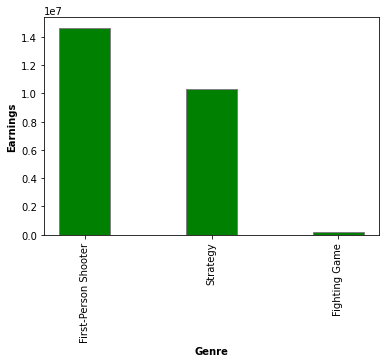

In [57]:
#visualization
plt.bar(old_earning.keys(), old_earning.values(), color ='g', width = 0.4, 
        edgecolor ='grey', label ='Middle') 
plt.xticks(rotation = 90)
plt.xlabel('Genre', fontweight ='bold') 
plt.ylabel('Earnings', fontweight ='bold') 
plt.show()